In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats, integrate

In [3]:
sb.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "4.分类数据的可视化")))

### 预先加载数据

In [4]:
titanic = sb.load_dataset("titanic")#泰坦尼克数据集
tips = sb.load_dataset("tips")#打赏消费数据集
iris = sb.load_dataset("iris")#鸢尾花数据集

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 类别数据的散点图表示

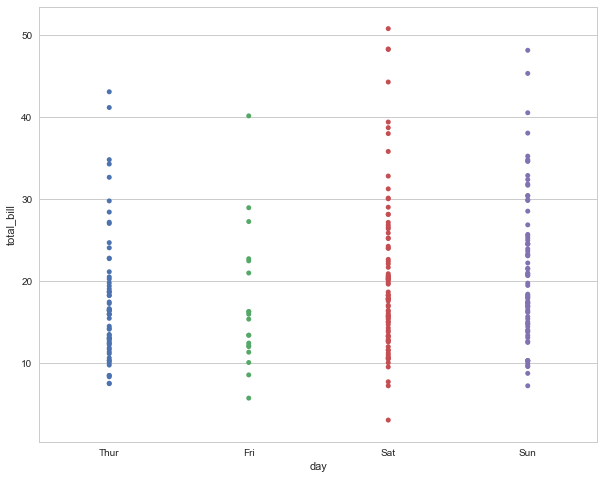

In [8]:
#通过长条散点图绘制类别数据
plt.figure(figsize=(10,8))
sb.stripplot(x="day", y="total_bill", data=tips)

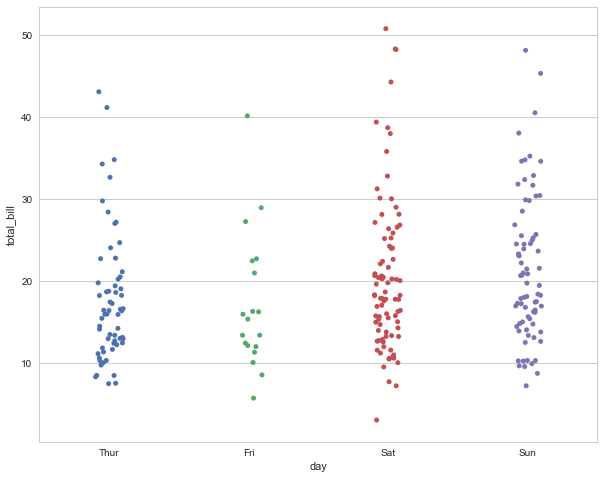

In [9]:
#stripplot绘制的点都在一个直线上，为了能够观察到整个数据集更加真实的情况，可以使用jitter关键字参数设置为True，把数据分散开便于观察。
plt.figure(figsize=(10,8))
#增加jitter“抖动”数据
sb.stripplot(x="day", y="total_bill", data=tips,jitter=True)

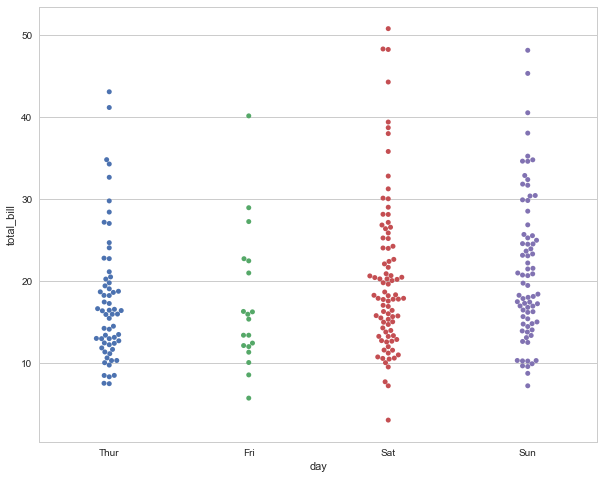

In [10]:
## Seaborn中提供了一个swarmplot方法，用于这种相互重叠遮盖的数据，内部实现了一个算法避免数据相互遮盖
plt.figure(figsize=(10,8))
sb.swarmplot(x="day", y="total_bill", data=tips)

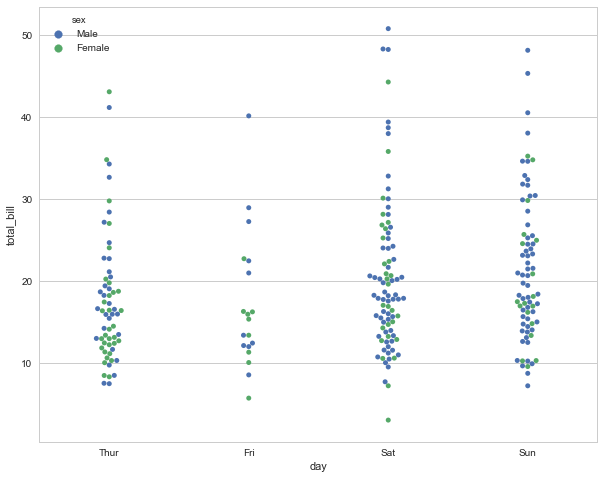

In [11]:
#对于嵌套的数据展示，swarmplot提供了hue关键字参数，用于嵌套数据的可视化，
#例如上面的数据中Fri中的数据包含性别Male和Female的数据，可以使用hue进行区别
plt.figure(figsize=(10,8))
sb.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


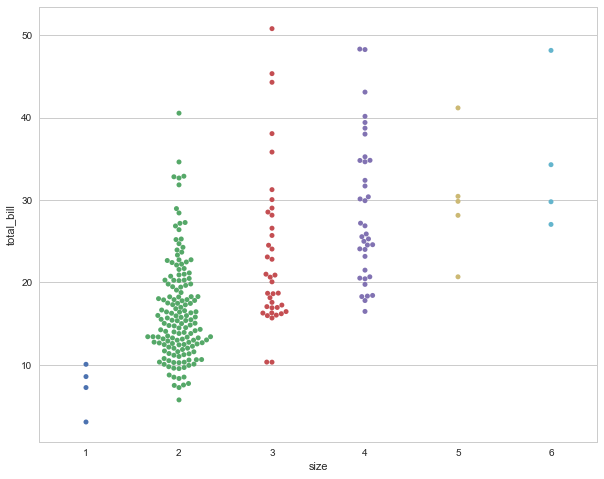

In [12]:
#Seaborn对于数值类型的类别会默认排序，对于字符类型的数据也是默认排序
plt.figure(figsize=(10,8))
sb.swarmplot(x="size", y="total_bill", data=tips)
tips.head()

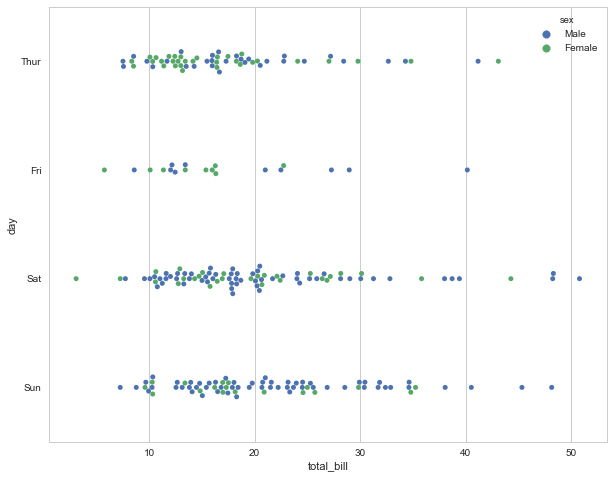

In [14]:
#改变x和y的顺序，边垂直为水平
plt.figure(figsize=(10,8))
sb.swarmplot(x="total_bill", y="day", data=tips,hue='sex')

### 分类数据的内部分布可视化

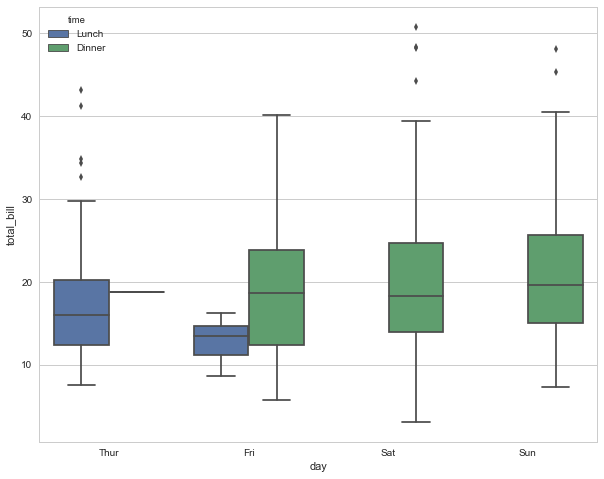

In [19]:
plt.figure(figsize=(10,8))
#使用boxplot方法绘制盒图，盒图包括最大值，最小值，中位数，上四分位数Q3，下四分位数Q1，及离群点信息。IQR=Q3-Q1也即是盒子的长度。上下的横线是
#最大值和最小值，超过1.5IQR的数据单独绘制，被认为是离群点。
#hue用于指定按某个类别绘制不同颜色,例如指定hue='time'
sb.boxplot(x="day", y="total_bill",hue='time', data=tips)

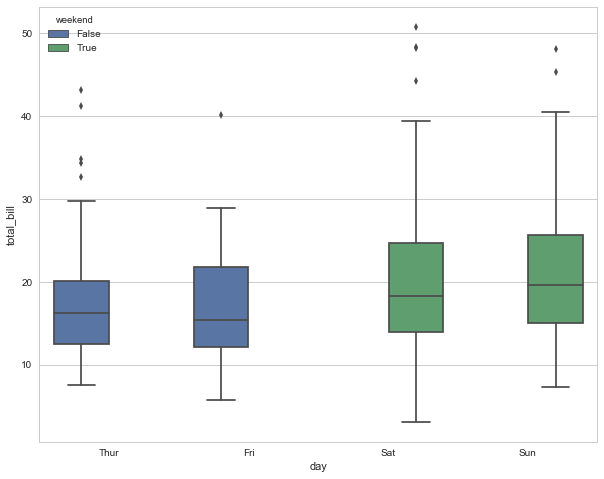

In [21]:
plt.figure(figsize=(10,8))
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sb.boxplot(x="day", y="total_bill", hue="weekend", data=tips, dodge=True)

In [16]:
tips['day'].head(10)

0    Sun
1    Sun
2    Sun
3    Sun
4    Sun
5    Sun
6    Sun
7    Sun
8    Sun
9    Sun
Name: day, dtype: category
Categories (4, object): [Thur, Fri, Sat, Sun]

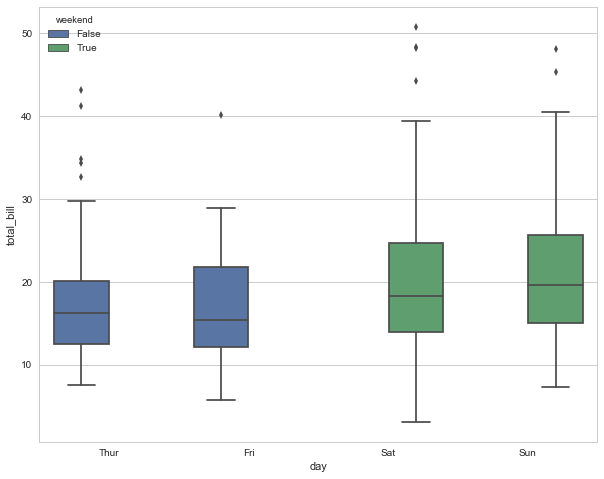

In [17]:
plt.figure(figsize=(10,8))
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sb.boxplot(x="day", y="total_bill", hue="weekend", data=tips, dodge=True)

### 小提琴图，更加直观的描绘类别数据内部的分布情况

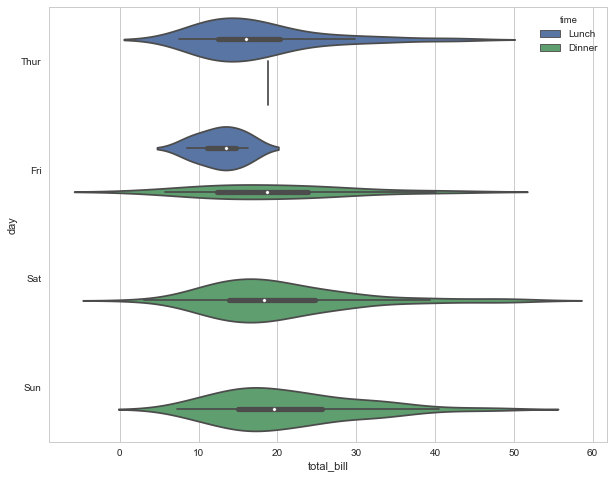

In [22]:
#小提琴图的实现中，用到了一个KDE核密度估计函数，用于更好的描绘数据的分布
#可以看到小提琴图包含了盒图的所有能描绘的信息，而且二外增加了核密度估计函数，注意：小提琴图中的离群点也是绘制在了途中，而不像盒图那样单独绘制
plt.figure(figsize=(10,8))
sb.violinplot(x="total_bill", y="day", hue="time", data=tips,dodge=True)

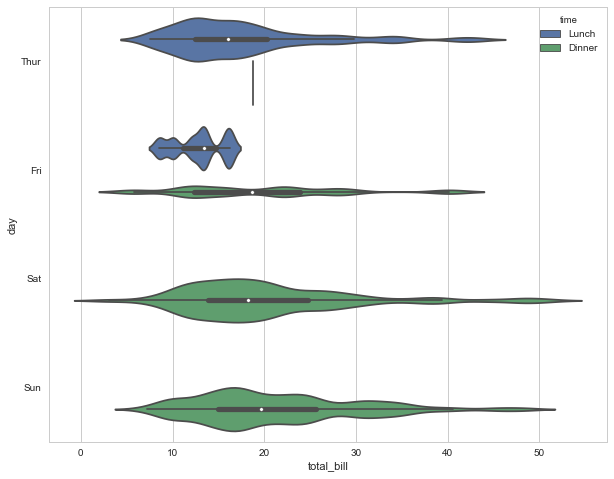

In [23]:
#violinplot方法中还有其他的参数，例如可以通过bw关键字参数指定核密度函数的“带宽”
plt.figure(figsize=(10,8))
sb.violinplot(x="total_bill", y="day", hue="time", data=tips,dodge=True,bw=0.2)

In [20]:
help(sb.violinplot)

Help on function violinplot in module seaborn.categorical:

violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
    Draw a combination of boxplot and kernel density estimate.
    
    A violin plot plays a similar role as a box and whisker plot. It shows the
    distribution of quantitative data across several levels of one (or more)
    categorical variables such that those distributions can be compared. Unlike
    a box plot, in which all of the plot components correspond to actual
    datapoints, the violin plot features a kernel density estimation of the
    underlying distribution.
    
    This can be an effective and attractive way to show multiple distributions
    of data at once, but keep in mind that the estimation procedure is
    influenced by the sa

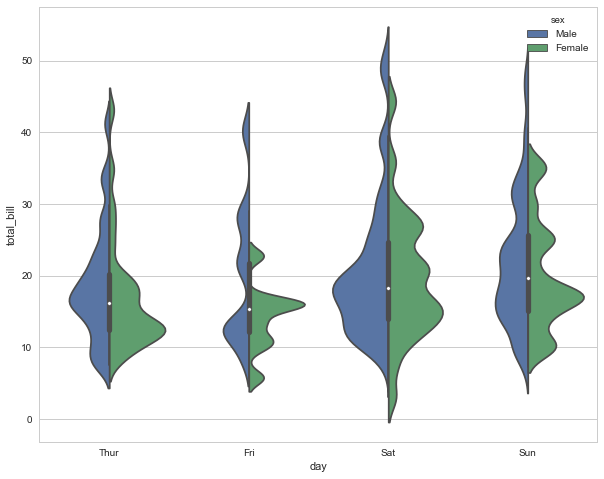

In [24]:
#小提琴图也可以按照中轴线进行分割，当然这种情况只适合两种类别的数据，因为中轴线只有左右两边
#通过hue关键字参数指定分割的数据，并且指定split为True
plt.figure(figsize=(10,8))
sb.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,bw=0.2)

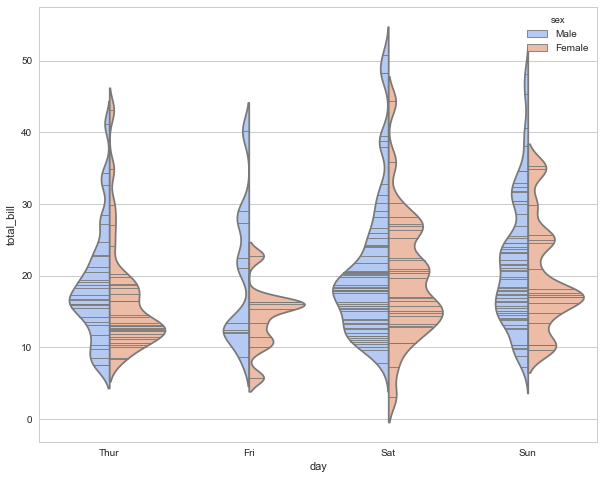

In [25]:
#通过inner关键字参数，显示每个内部的数据详细信息，而不是上面的汇总信息
plt.figure(figsize=(10,8))
sb.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,bw=0.2,inner="stick", palette="coolwarm")

In [27]:
#通过palette指定调色板
#可选参数如下：
 Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, 
    CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, 
    Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r,
    Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r,
    PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,
    RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1,
    Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, 
    Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, 
    YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, 
    afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, 
    brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, 
    copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, 
    gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, 
    gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r,
    gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, 
    icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r,
    nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism,
    prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spectral, spectral_r, 
    spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, 
    tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

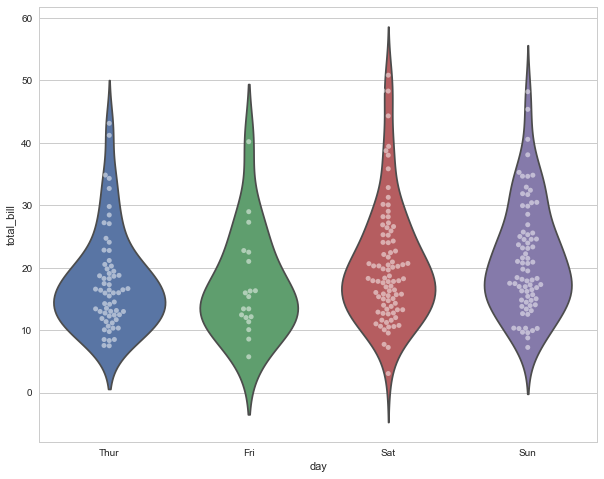

In [26]:
#violinplot和swarmplot的组合使用
plt.figure(figsize=(10,8))
sb.violinplot(x="day", y="total_bill", data=tips, inner=None)
sb.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5)

### 条形图

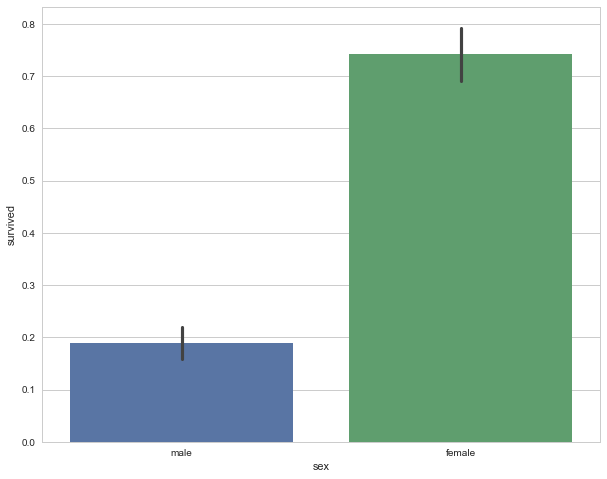

In [27]:
plt.figure(figsize=(10,8))
sb.barplot(x="sex", y="survived", data=titanic)

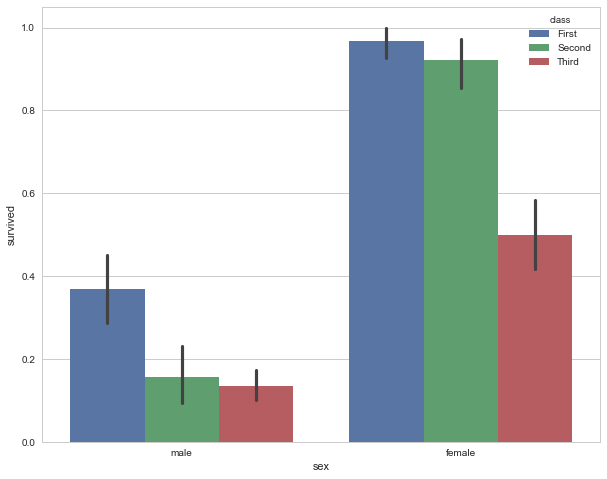

In [28]:
#通过hue指定类别
plt.figure(figsize=(10,8))
sb.barplot(x="sex", y="survived", hue='class',data=titanic)

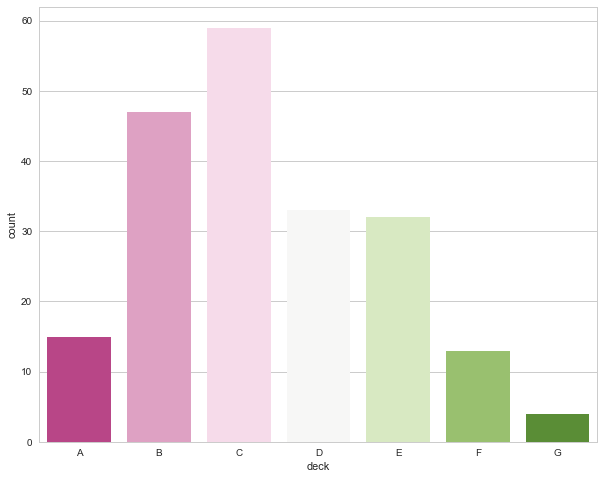

In [29]:
#使用countplot按照数量绘制条形图
plt.figure(figsize=(10,8))
sb.countplot(x="deck", data=titanic, palette="PiYG")

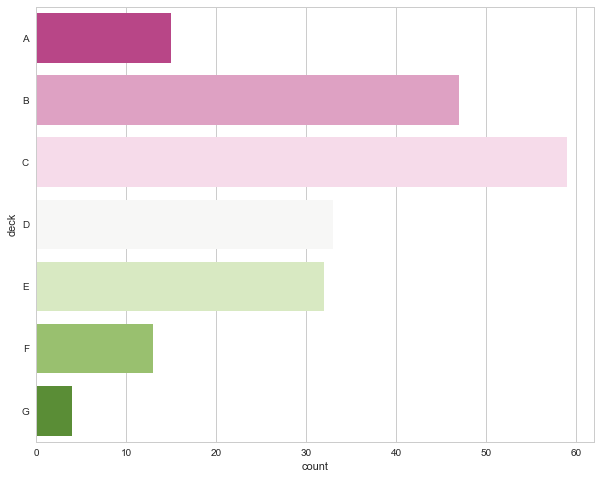

In [30]:
#水平方向的条形图，通过关键字参数y指定
plt.figure(figsize=(10,8))
sb.countplot(y="deck",  data=titanic, palette="PiYG")

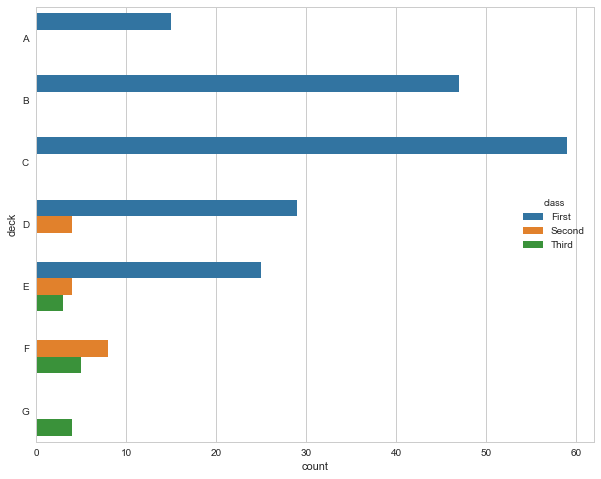

In [31]:
#通过关键字参数hue指定显示类别数据中的不同观测
plt.figure(figsize=(10,8))
sb.countplot(y="deck", hue="class",data=titanic, palette="tab10")

### 点图/折线图

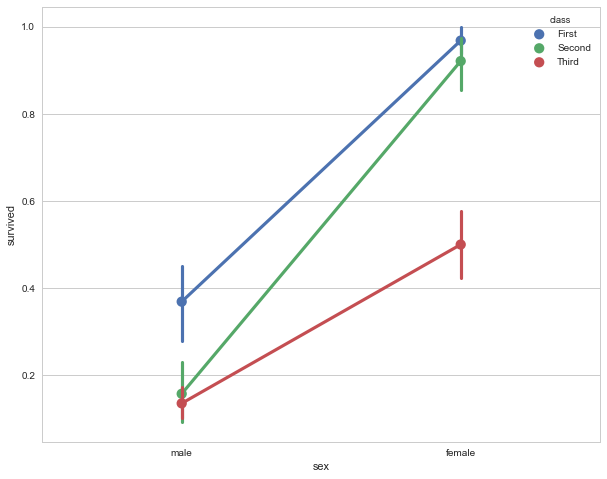

In [32]:
#通过pointplot绘制点图
plt.figure(figsize=(10,8))
sb.pointplot(x="sex", y="survived", hue="class", data=titanic)

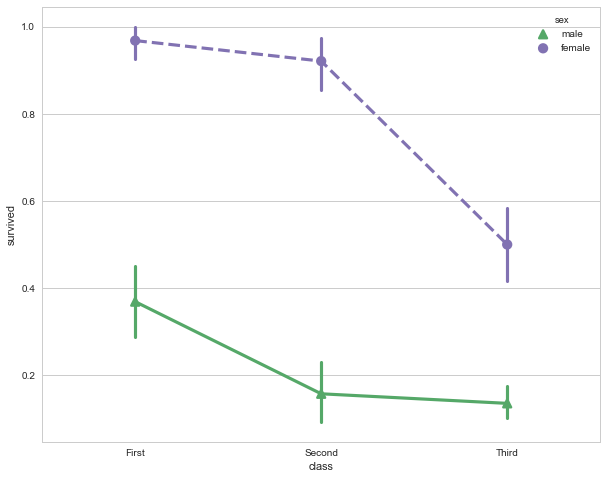

In [33]:
#指定不同的展示形状和线条样式
plt.figure(figsize=(10,8))
sb.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"])

### 多面板数据展示

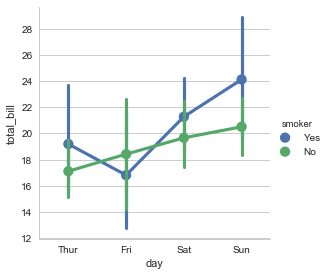

In [34]:
#使用更加高层次的方法,factorplot绘制多面板数据图
#factorplot默认会产生pointplot
#plt.figure(figsize=(10,8))
sb.factorplot(x="day", y="total_bill", hue="smoker", data=tips)

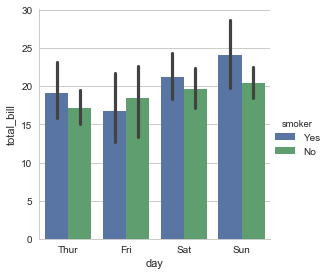

In [35]:
#通过kind关键字参数，指定想要的图标样式
sb.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar")

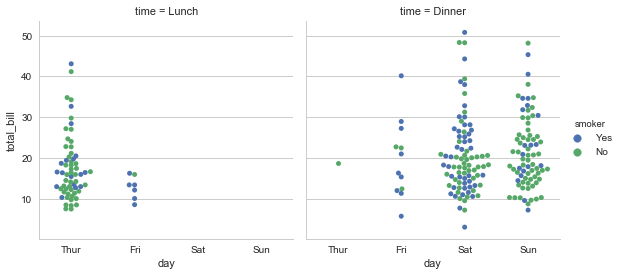

In [38]:
#factorplot的优势是可以非常轻松的完成多变量关系图的绘制
#例如下面绘制按照用餐时间分类的图，使用关键字参数col指定绘制图标的列，则每一列都会绘制一幅swarm图
sb.factorplot(x="day", y="total_bill", hue="smoker",col="time", data=tips, kind="swarm")

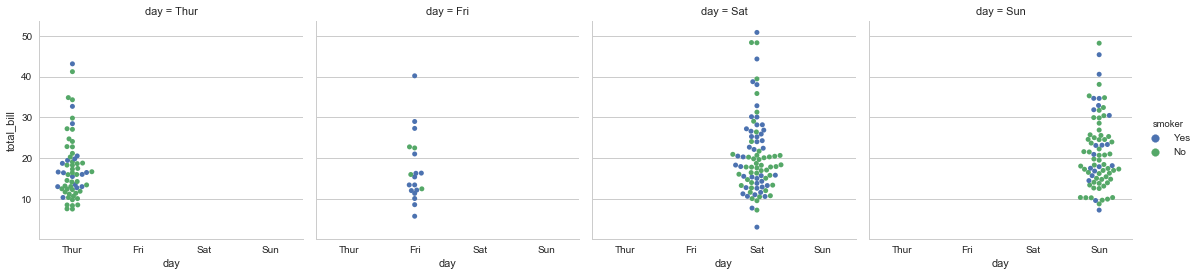

In [47]:
#指定列名为day
sb.factorplot(x="day", y="total_bill", hue="smoker",col='day', data=tips, kind="swarm")

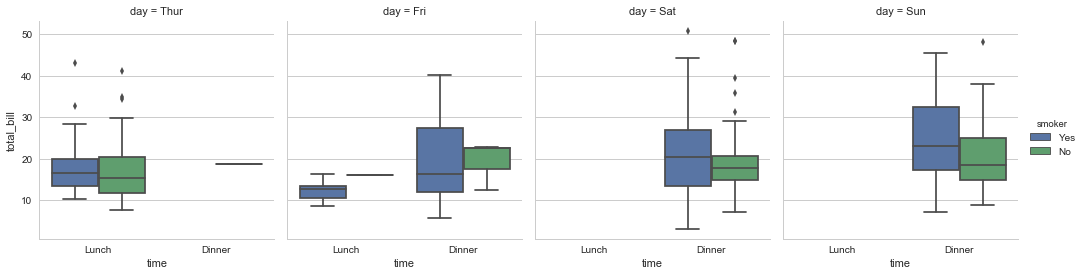

In [39]:
#任意的plot图表都可以进行绘制，通过关键字参数kind进行指定,通过size和aspect指定大小和宽高比
#指定图表类型为box盒图
sb.factorplot(x="time", y="total_bill", hue="smoker",col="day", data=tips, kind="box", size=4, aspect=.9)

<class 'seaborn.axisgrid.PairGrid'>


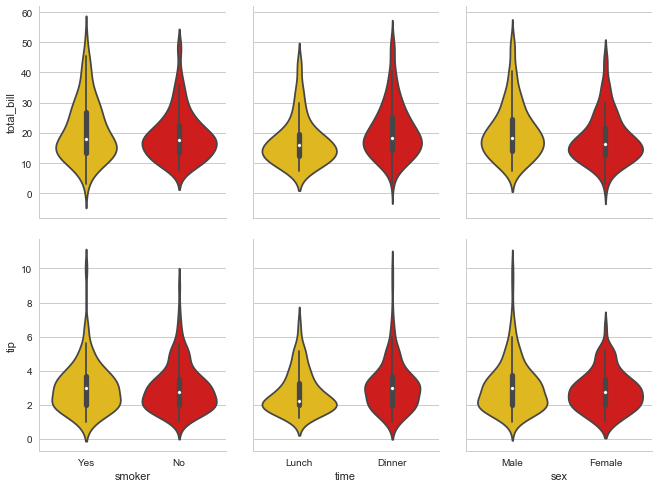

In [40]:
#也可以使用PairGrid来完成不同变量之间关系图的绘制
g = sb.PairGrid(tips, x_vars=["smoker", "time", "sex"],y_vars=["total_bill", "tip"],aspect=.9, size=3.5)
print(type(g))
g.map(sb.violinplot, palette="hot_r")